## FRANCE DASHBOARD USING PUBLIC STATISTICS

# Environnement setup

Import needed modules

In [75]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

Add functions, load data and create needed dictionnaries

In [76]:
# President mandates
president = {
    'Jacques Chirac': [1995, 2007],
    'Nicolas Sarkozy': [2007, 2012],
    'François Hollande': [2012, 2017],
    'Emmanuel Macron': [2017, 2022],}

# Add president mandates to graphs
def add_pres(president):
    # Add vertical lines for each presidential term
    for president, years in president.items():
        plt.axvline(x=years[0], color='k', linestyle='--', linewidth=1)
        plt.text(
            years[0] + 0.5, 
            plt.ylim()[1] - 5, 
            president, 
            rotation=90, 
            verticalalignment='top')

# Read the Excel file into a DataFrame
df = pd.read_excel("data/T_3301.xlsx", sheet_name="Data")
GDP = pd.read_excel("data/FRA_GDP.xlsx")

# Remove all starting whitespace
df.rename(columns=lambda x: x.strip(), inplace=True)

# For plots
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
fontP = FontProperties()
fontP.set_size('xx-small')

# Focus on each sector
Sector defined by: https://juste-repartition.fr/wp-content/uploads/2022/11/Estimation-depenses-publiques-France-2022.xlsx

In [62]:
# Create a new dataframe
df_sector = df.copy()
df_sector = df_sector.merge(GDP, on='Annuel')

df_sector.columns = [col[:4] for col in df_sector.columns]

df_sector["Retraites"] = df_sector["10.2"] + df_sector["10.3"]
df_sector["Assurance-maladie-santé"] = df_sector["10.1"] + df_sector["07.1"] + df_sector["07.2"] + df_sector["07.3"] + df_sector["07.4"] + df_sector["07.5"] + df_sector["07.6"]
df_sector["Famille"] = df_sector["10.4"]
df_sector["Chomage"] = df_sector["10.5"]
df_sector["Autres solidarités"] = df_sector["10.6"] + df_sector["10.7"] + df_sector["10.8"] + df_sector["10.9"]
df_sector["Education"] = df_sector["09.1"] + df_sector["09.2"] + df_sector["09.3"] + df_sector["09.4"] + df_sector["09.5"] + df_sector["09.6"] + df_sector["09.7"] + df_sector["09.8"] + df_sector["01.4"]
df_sector["Soutien à l'économie"] = df_sector["01.2"] + df_sector["04.1"] + df_sector["04.2"] + df_sector["04.4"] + df_sector["04.6"] + df_sector["04.7"] + df_sector["04.8"] + df_sector["04.9"]
df_sector["Transports et urbanisme"] = df_sector["04.5"] + df_sector["06.1"] + df_sector["06.2"] + df_sector["06.3"] + df_sector["06.4"] + df_sector["06.5"] + df_sector["06.6"]
df_sector["Services Généraux"] = df_sector["01.1"] + df_sector["01.3"] + df_sector["01.5"] + df_sector["01.6"] + df_sector["01.8"]
df_sector["Environnement et Energie"] = df_sector["04.3"] + df_sector["05.1"] + df_sector["05.2"] + df_sector["05.3"] + df_sector["05.4"] + df_sector["05.5"] + df_sector["05.6"]
df_sector["Culture et sport"] = df_sector["08.1"] + df_sector["08.2"] + df_sector["08.3"] + df_sector["08.4"] + df_sector["08.5"] + df_sector["08.6"]
df_sector["Défense, Sécurité et Justice"] = df_sector["02.1"] + df_sector["02.2"] + df_sector["02.3"] + df_sector["02.4"] + df_sector["02.5"] + df_sector["03.1"] + df_sector["03.6"] + df_sector["03.2"] + df_sector["03.3"] + df_sector["03.4"] + df_sector["03.5"]
df_sector["Charges de la dette"] = df_sector["01.7"]

df_column = [col for col in df_sector.columns if re.match(r'^[A-Z]', col)]
df_sector = df_sector[df_column]

df_sector.iloc[:,2:15,] = df_sector.iloc[:,2:15,].div(df_sector.PIB, axis=0)*100

df_sector

,Annu,PIB,Retraites,Assurance-maladie-santé,Famille,Chomage,Autres solidarités,Education,Soutien à l'économie,Transports et urbanisme,Services Généraux,Environnement et Energie,Culture et sport,"Défense, Sécurité et Justice",Charges de la dette
0,1995,1217.029,12.268648,9.872485,2.607497,1.728882,1.989764,6.403381,3.064512,3.506161,4.047397,0.885764,0.989459,3.989634,3.511584
1,1996,1251.017,12.205590,10.025044,2.594129,1.830191,2.018358,6.374494,3.126336,3.253753,4.019050,0.861619,0.964016,4.039673,3.623852
2,1997,1291.470,12.281354,9.795969,2.582716,1.812353,2.091493,6.313503,2.887098,3.103208,4.393056,0.882096,0.992745,3.860407,3.590405
3,1998,1350.605,12.107759,9.661448,2.480370,1.758101,2.089360,6.216770,2.766168,2.964968,4.030564,0.862428,1.024578,3.566846,3.445715
4,1999,1399.743,12.071359,9.599405,2.474383,1.790043,2.146894,6.271723,2.758792,2.905605,4.136902,0.875589,1.053050,3.468851,3.125145
5,2000,1477.413,11.795618,9.281765,2.455102,1.744468,2.108618,6.162935,2.627227,3.071991,4.118754,0.933185,1.086020,3.301514,3.006268
6,2001,1536.948,11.815429,9.300965,2.405937,1.740918,2.214519,6.182122,2.550314,2.782202,4.040475,0.986370,1.188980,3.460559,3.091907
7,2002,1586.519,11.883879,9.604297,2.368204,1.897929,2.249894,6.351200,2.669366,2.955275,3.923811,1.025390,1.278585,3.567433,3.063752
8,2003,1629.363,12.158555,9.915777,2.401552,2.095788,2.271808,6.365187,2.509386,3.027564,3.806764,1.079808,1.347091,3.417471,2.916477
9,2004,1702.780,12.513478,10.055850,2.359847,2.061511,1.853440,6.133676,2.558463,3.030515,3.828739,1.072775,1.332879,3.378475,2.843938


### Plot of the evolution of the expenses between 1995 and 2002, as a % of the GDP

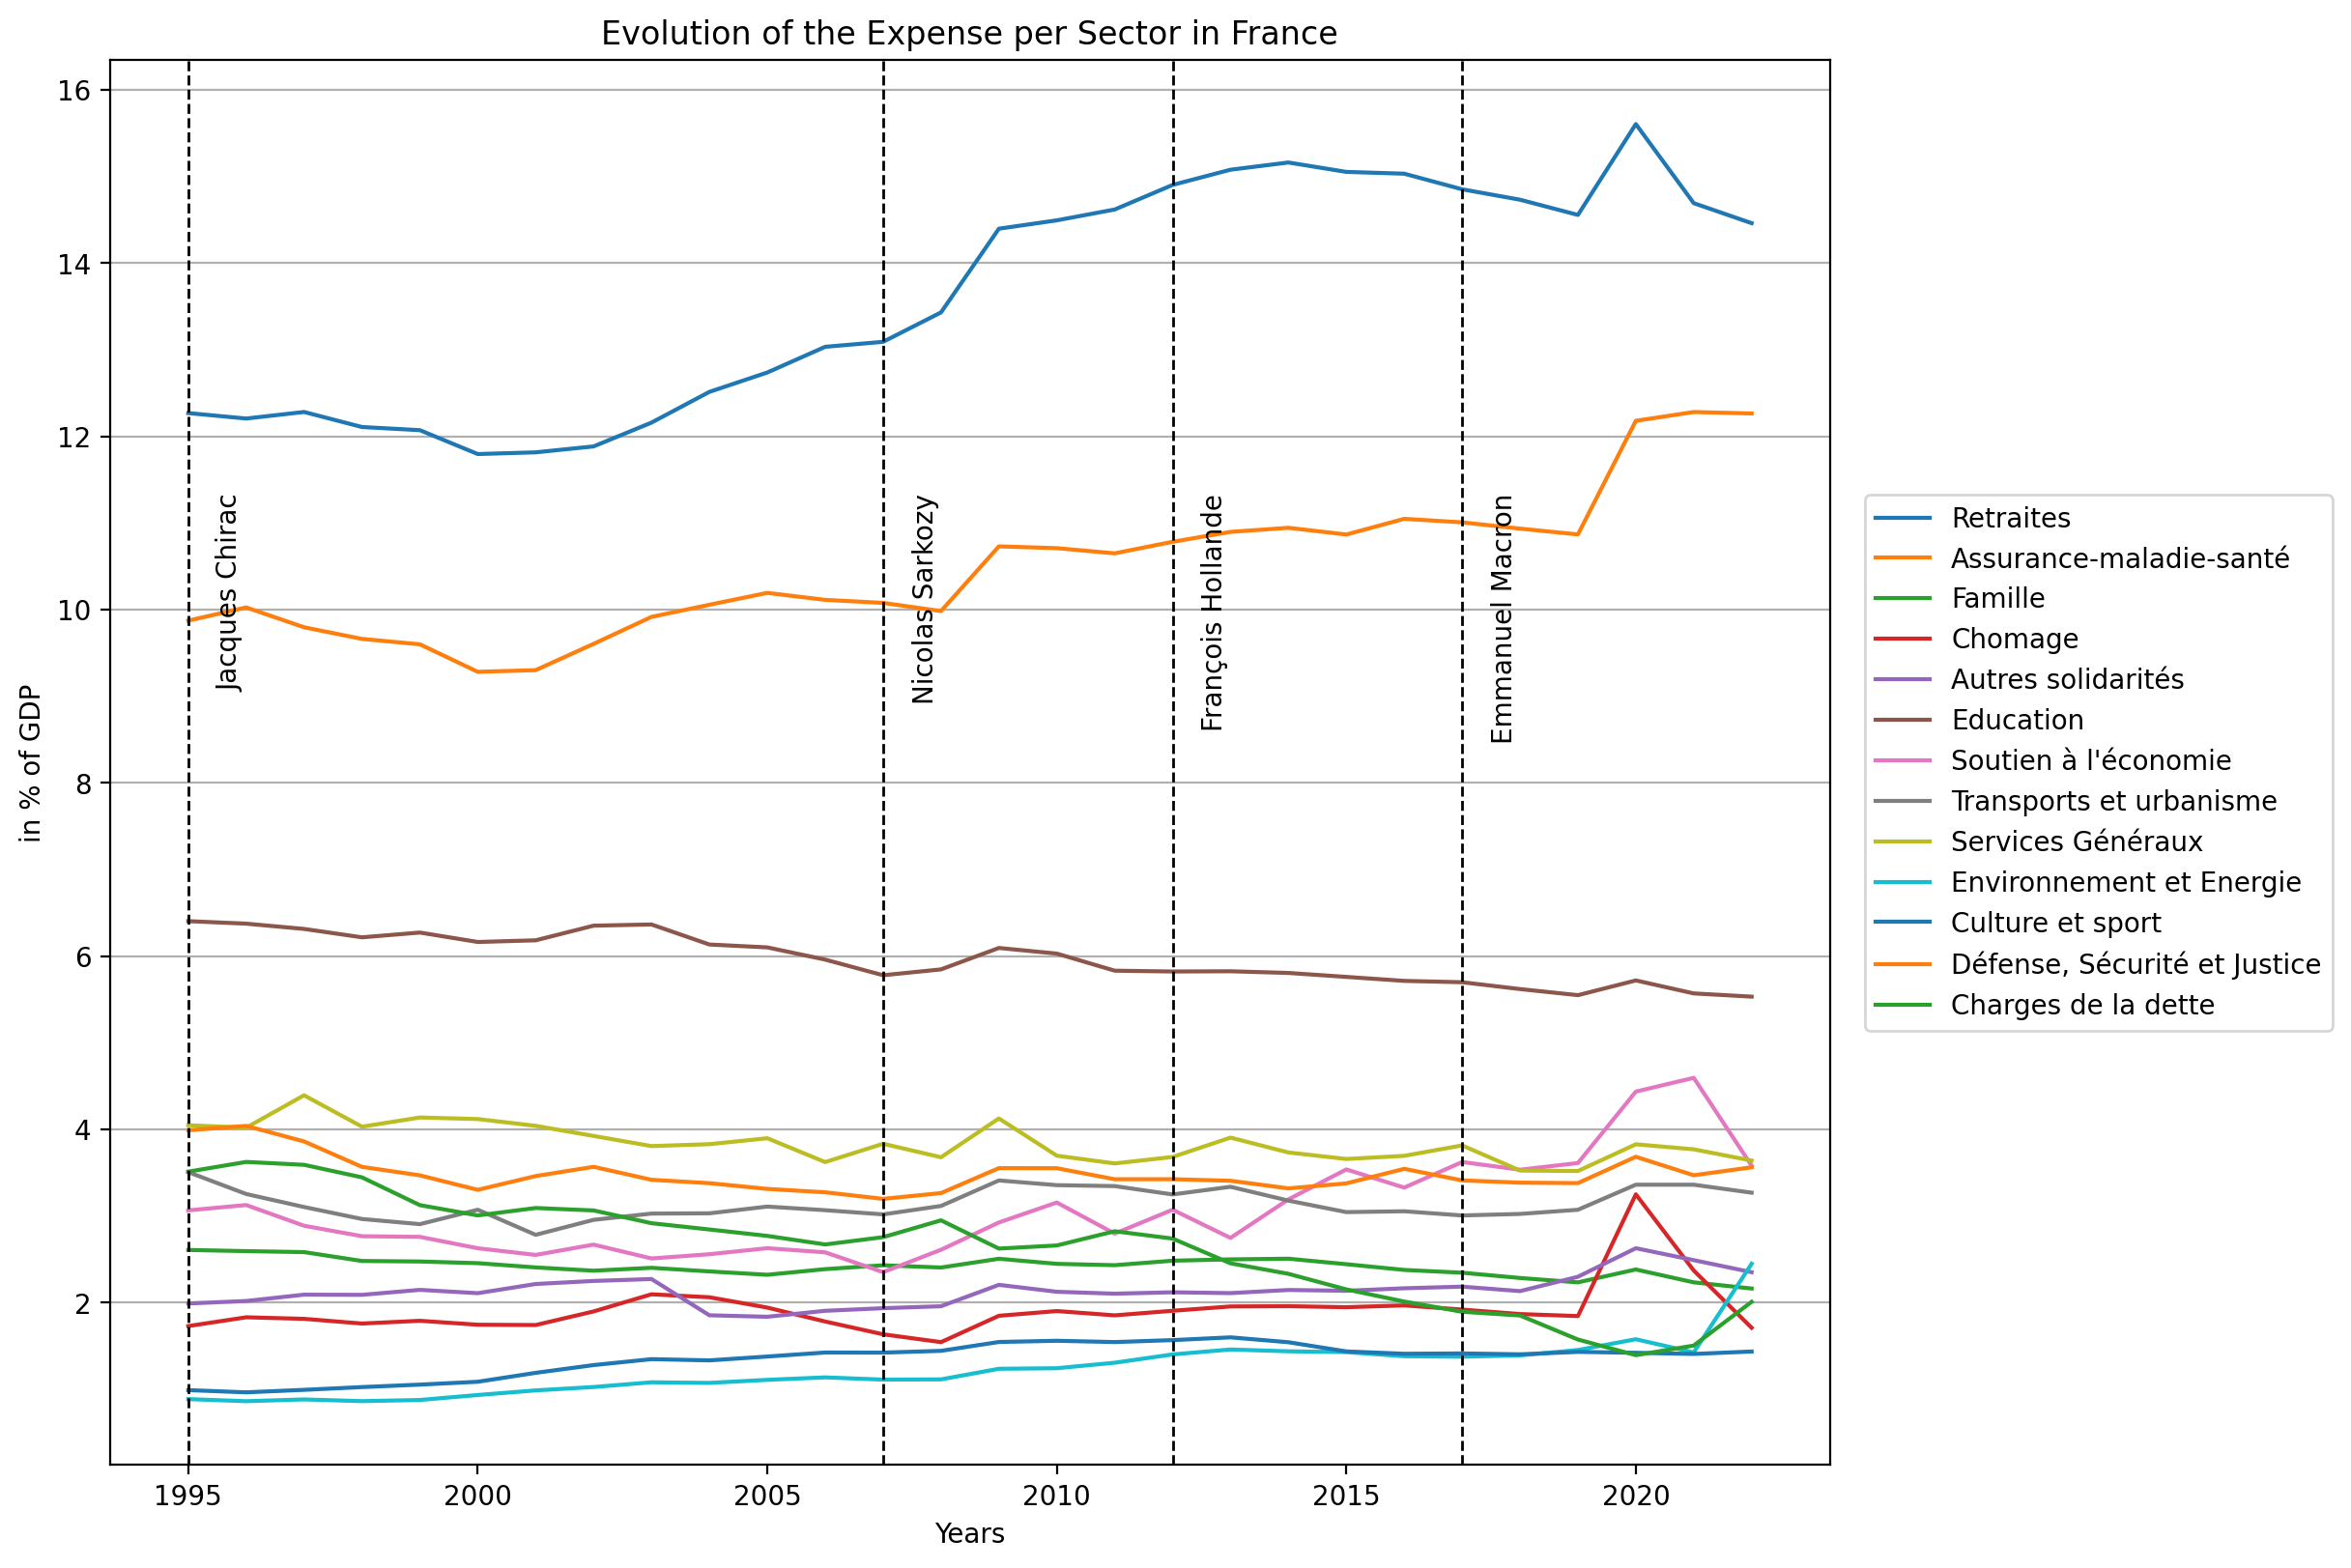

In [58]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(df_sector['Annu'], df_sector[df_sector.columns.drop(['Annu', 'PIB'])], label=df_column[2:])

add_pres(president)
plt.xlabel('Years')
plt.ylabel("in % of GDP")
plt.title('Evolution of the Expense per Sector in France')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.grid(True, axis='y')
plt.show()

### Difference of expenses (as a % of GDP) for each president between the start of the term and its end (in %)

C:\Users\Ugo\AppData\Local\Temp\ipykernel_23040\3860066971.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sectors, rotation=90)


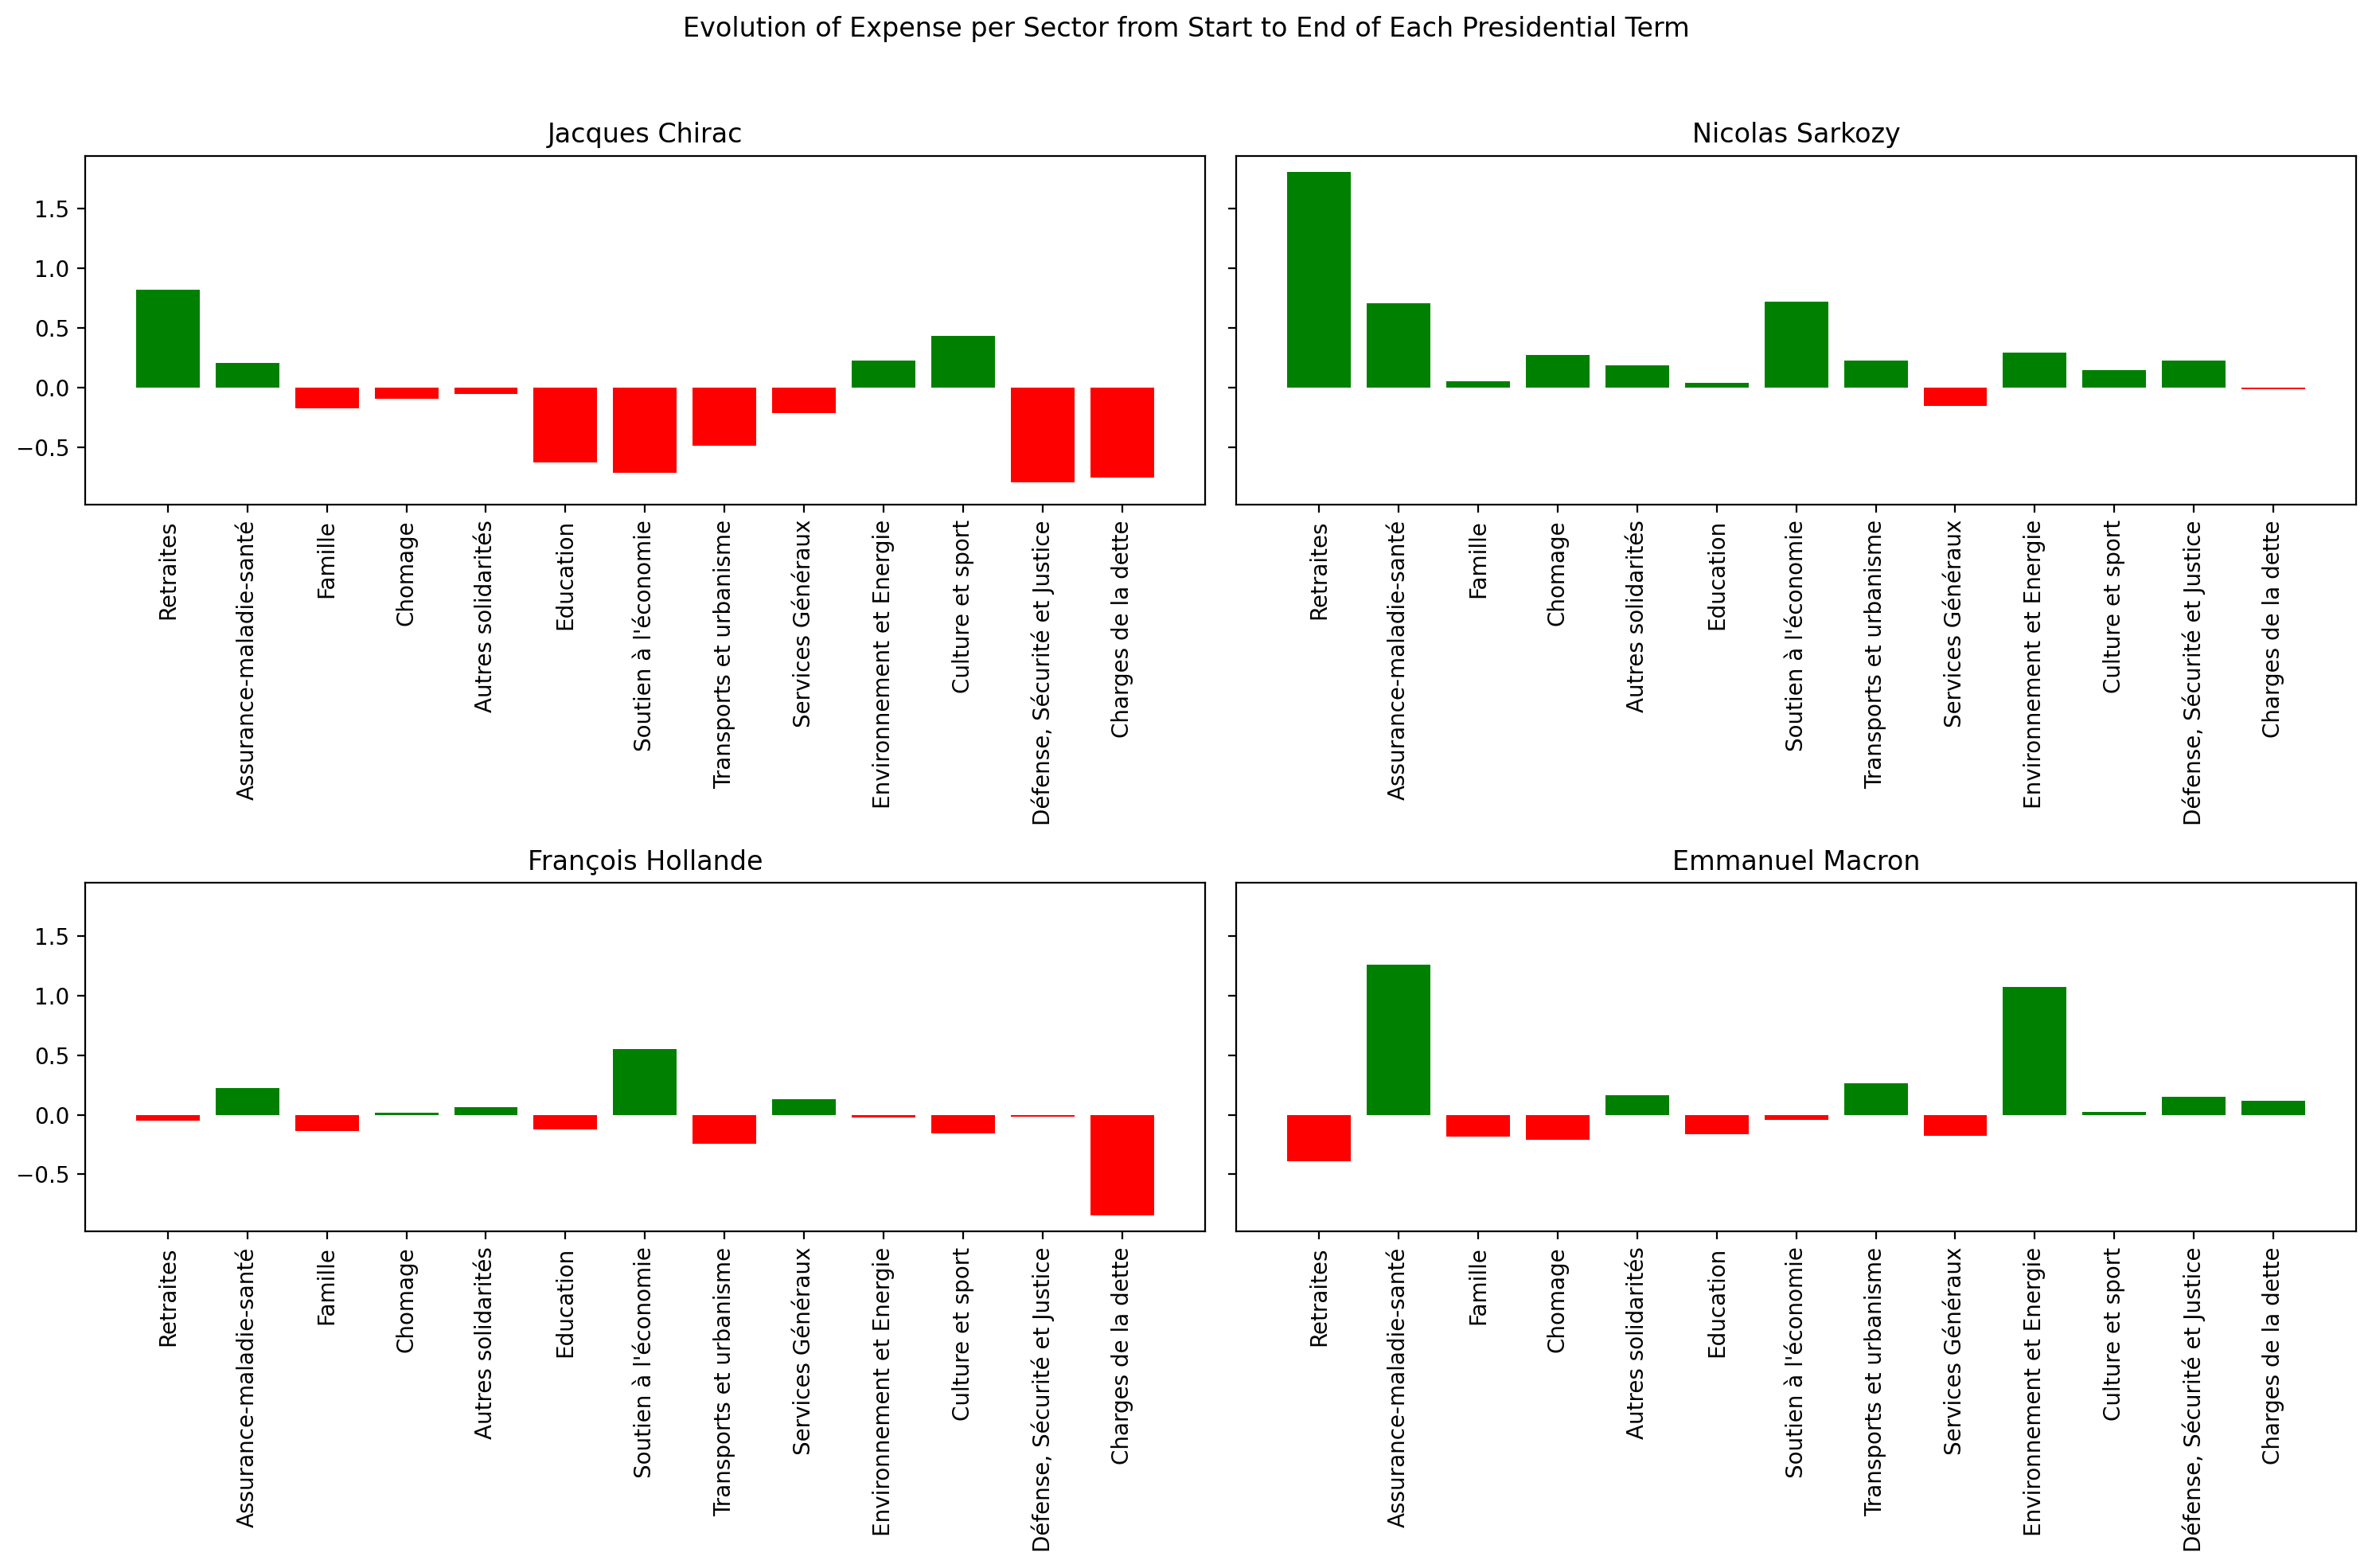

In [81]:
# Drop non-sector columns
sectors = df_sector.columns.drop(['Annu', 'PIB'])

# Mandates
president = {
    'Jacques Chirac': [1995, 2007],
    'Nicolas Sarkozy': [2007, 2012],
    'François Hollande': [2012, 2017],
    'Emmanuel Macron': [2017, 2022],}

# Calculate the difference in expenses from the start to the end of each term
president_diff = {}

for pres, (start, end) in president.items():
    start_data = df_sector[df_sector['Annu'] == start]
    end_data = df_sector[df_sector['Annu'] == end]
    
    if not start_data.empty and not end_data.empty:
        diff = end_data[sectors].values[0] - start_data[sectors].values[0]
        president_diff[pres] = diff

# Create the bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for ax, (president, diffs) in zip(axes.flatten(), president_diff.items()):
    colors = ['green' if value > 0 else 'red' for value in diffs]
    ax.bar(sectors, diffs, color=colors)
    ax.set_title(president)
    ax.set_xticklabels(sectors, rotation=90)

fig.suptitle('Evolution of Expense per Sector from Start to End of Each Presidential Term')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()